In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path = r"C:\Users\jpkun\OneDrive\Documentos\Trilha_Python-Data-AI\projects_data_analysis_and_BI\netflix\netflix_titles.csv"
df = pd.read_csv(path)


In [41]:
#Understanding dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [42]:
#viewing and handling null values
columns_with_empty_data = df.isna().sum()

print(columns_with_empty_data)
#df = df.fillna("")

df

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**1 - How many "Movie" and "TV Show" titles are there in the dataset?**

In [5]:
group_title = df.groupby('type')['show_id'].count().reset_index()
print(group_title)

print("There are 6131 movies, and 2676 TV shows")

      type  show_id
0    Movie     6131
1  TV Show     2676
There are 6131 movies, and 2676 TV shows


***Data visualization***

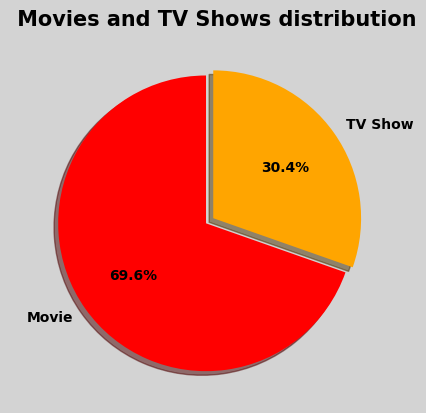

In [ ]:
label = group_title['type']
values = group_title['show_id']
explode = (0.06, 0) # the distance each slice will be moved away from the center


plt.figure(facecolor='lightgray')
plt.pie(
    values, labels=label, autopct='%1.1f%%',
    colors=['red','orange'],
    shadow=True, startangle=90,
    textprops={'weight': 'bold', 'fontsize': 10},
    explode=explode)

plt.title(" Movies and TV Shows distribution", weight='bold', fontsize=15)
plt.show()


**2 - How many titles were released each year? Are there any years with an unusually high or low number of releases?**

In [84]:
#df['release_year'].value_counts()

grouped_release_year = df.groupby(by='release_year')['show_id'].count().reset_index()
grouped_release_year.sort_values(by='release_year')

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


**3 - Which are the top 5 countries that produce the most content on Netflix?**

In [54]:
grouped_top_5_countries = df.groupby(by='country')['show_id'].count().reset_index()
grouped_top_5_countries.sort_values('show_id', ascending = False, inplace = True)
grouped_top_5_countries.rename(columns={"show_id":"Amount of movies", 'country':'Country'}, inplace = True)

total_content = df['show_id'].count() #8807
grouped_top_5_countries['Percent'] = ((grouped_top_5_countries['Amount of movies'] / total_content) *100).round(1)

top_5_countries = grouped_top_5_countries.head()
top_5_countries

,Country,Amount of movies,Percent
603,United States,2818,32.0
251,India,972,11.0
506,United Kingdom,419,4.8
319,Japan,245,2.8
435,South Korea,199,2.3


***Data visualization***

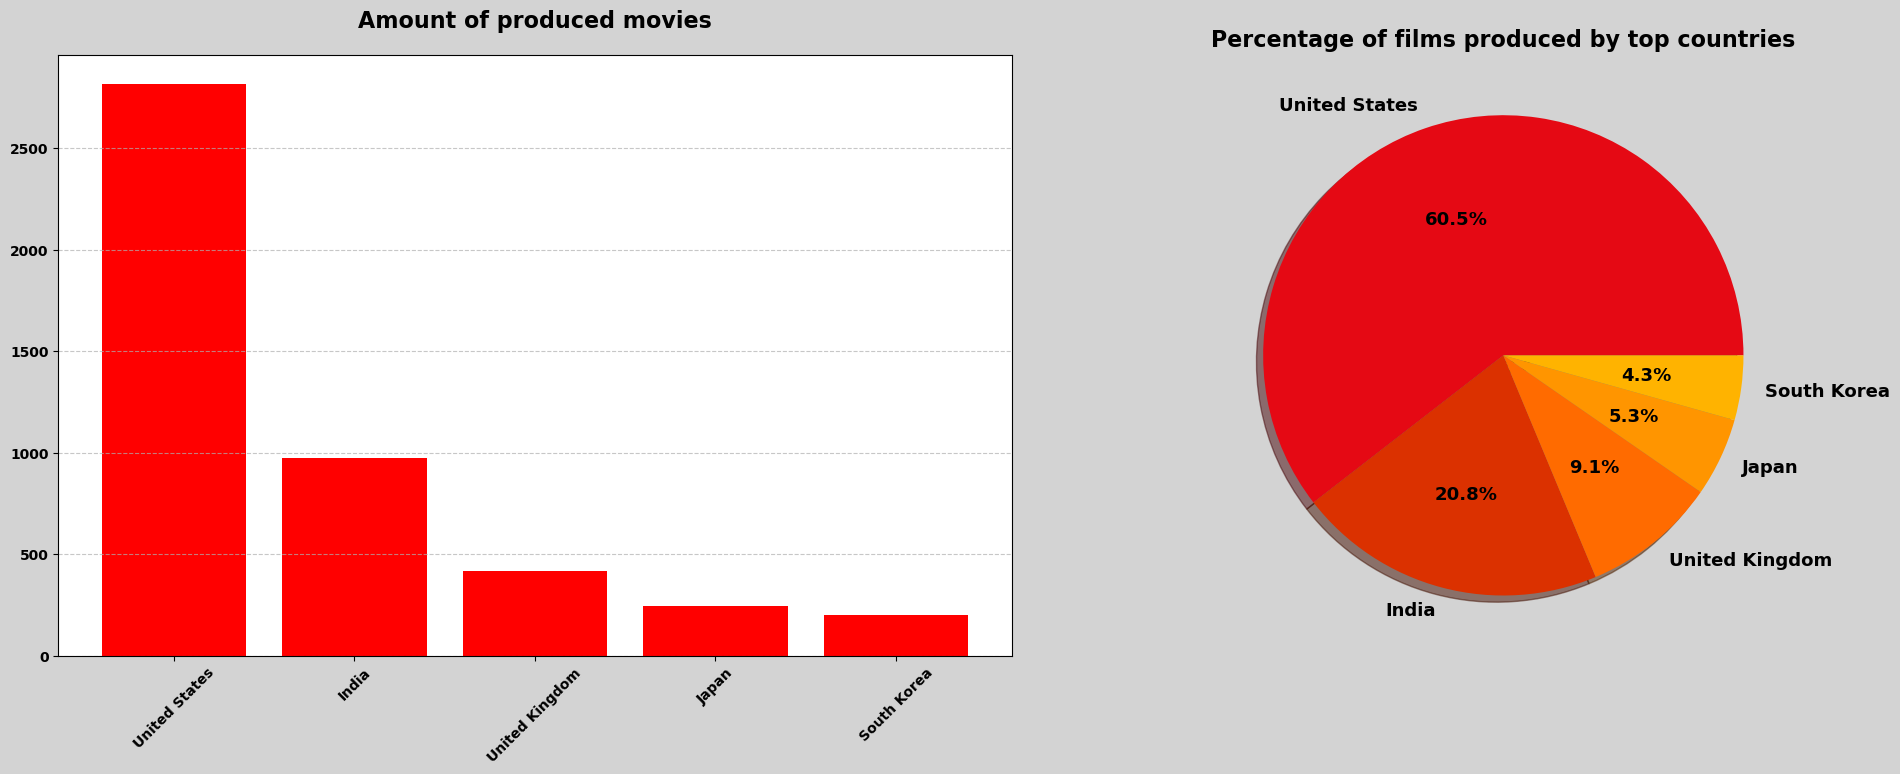

In [ ]:
#1 - Create the figure, set size and color
#2 - Extract "X" and "Y" variables
#3 - Define the subplot space
#4 - Define the chart type
#5 - Plot adjustments

plt.figure(figsize=(20,14), facecolor='lightgray')

#variables of plot 1
x = top_5_countries['Country']
y = top_5_countries['Amount of movies']

plt.subplot(2,2,1)
plt.bar(x,y, color='red')
plt.title("Amount of produced movies",fontsize=16, pad=20, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(
    rotation=45,
    fontsize=10,
    color='black',
    weight='bold'
)

plt.yticks(
    fontsize=10,
    color='black',
    weight='bold'
)
plt.tight_layout()

plt.subplot(2,2,2)

#variables of plot 2
x_pie = top_5_countries['Country']
y_pie = top_5_countries['Percent']
paleta_netflix_soft = [
    '#E50914',  # Vermelho suavizado (tom pastel)
    '#DB3100',  # Vermelho Netflix original (logo)
    '#FF6B00',  # Laranja queimado
    '#FF9500',  # Laranja médio
    '#FFB300'   # Laranja dourado
]

plt.pie(
    y_pie, labels=x_pie, autopct='%1.1f%%',
    shadow=True,
    textprops={
        'weight': 'bold', 
        'fontsize': 13,
        "color":"black"
        },
    colors=paleta_netflix_soft,
    )

plt.title("Percentage of films produced by top countries", fontsize=16, weight='bold')

plt.show()

**4 - Who are the top 5 most frequent directors in the dataset, and how many titles has each directed?**

In [4]:
#1 and 2
df_directors = df[['show_id','type','title','director']].dropna()

In [5]:
#3
df_directors['director'] = df_directors['director'].str.split(', ')

In [6]:
#4
df_directors = df_directors.explode('director')
df_directors

,show_id,type,title,director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson
2,s3,TV Show,Ganglands,Julien Leclercq
5,s6,TV Show,Midnight Mass,Mike Flanagan
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha
...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari
8802,s8803,Movie,Zodiac,David Fincher
8804,s8805,Movie,Zombieland,Ruben Fleischer
8805,s8806,Movie,Zoom,Peter Hewitt


In [7]:
grouped_top_5_directors = df_directors.groupby(by='director')['show_id'].count().reset_index()
grouped_top_5_directors.rename(columns={"show_id":"Amount of movies"}, inplace = True)
grouped_top_5_directors.sort_values('Amount of movies', ascending=False, inplace = True)

In [10]:
top_5_directors = grouped_top_5_directors.head()
top_5_directors

,director,Amount of movies
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16


***Data visualization***

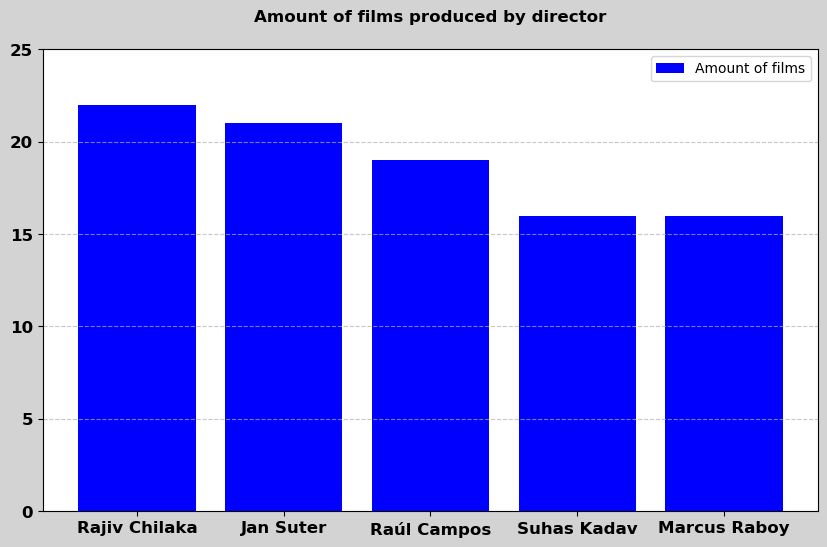

In [26]:
#1 - Create the figure, set size and color
#2 - Extract "X" and "Y" variables
#3 - Define the subplot space
#4 - Define the chart type
#5 - Plot adjustments

plt.figure(figsize=(10,6), facecolor='lightgray')

x = top_5_directors['director']
y = top_5_directors['Amount of movies']

plt.subplot(1,1,1)

plt.bar(x,y, color='blue', label='Amount of films')
plt.legend()
plt.title(
    "Amount of films produced by director", 
    pad=20, 
    fontsize=12, 
    weight='bold'
)

plt.xticks(
    fontsize=12,
    weight="bold" 
)

plt.yticks(
    fontsize=12,
    weight="bold"
)

plt.axis(ymax=25)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

***5 - Has Netflix increased the number of new titles added year over year?***

In [27]:
#1 - Process the data of the column 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
#2 - Cleaning the empty rows
df_increased_titles = df[['show_id','title','date_added']].dropna()
df_increased_titles

,show_id,title,date_added
0,s1,Dick Johnson Is Dead,2021-09-25
1,s2,Blood & Water,2021-09-24
2,s3,Ganglands,2021-09-24
3,s4,Jailbirds New Orleans,2021-09-24
4,s5,Kota Factory,2021-09-24
...,...,...,...
8802,s8803,Zodiac,2019-11-20
8803,s8804,Zombie Dumb,2019-07-01
8804,s8805,Zombieland,2019-11-01
8805,s8806,Zoom,2020-01-11


In [29]:
#3 - Extract the year
df_increased_titles['year_added'] = df_increased_titles['date_added'].dt.year
df_increased_titles.drop(columns='date_added', inplace = True)

df_increased_titles

,show_id,title,year_added
0,s1,Dick Johnson Is Dead,2021
1,s2,Blood & Water,2021
2,s3,Ganglands,2021
3,s4,Jailbirds New Orleans,2021
4,s5,Kota Factory,2021
...,...,...,...
8802,s8803,Zodiac,2019
8803,s8804,Zombie Dumb,2019
8804,s8805,Zombieland,2019
8805,s8806,Zoom,2020


In [30]:
#4 - Grouped the dataset
grouped_year = df_increased_titles.groupby(by='year_added')['title'].count().reset_index()
grouped_year.rename(columns={"title":"number of releases"}, inplace = True)
grouped_year

,year_added,number of releases
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


***Data visualization***

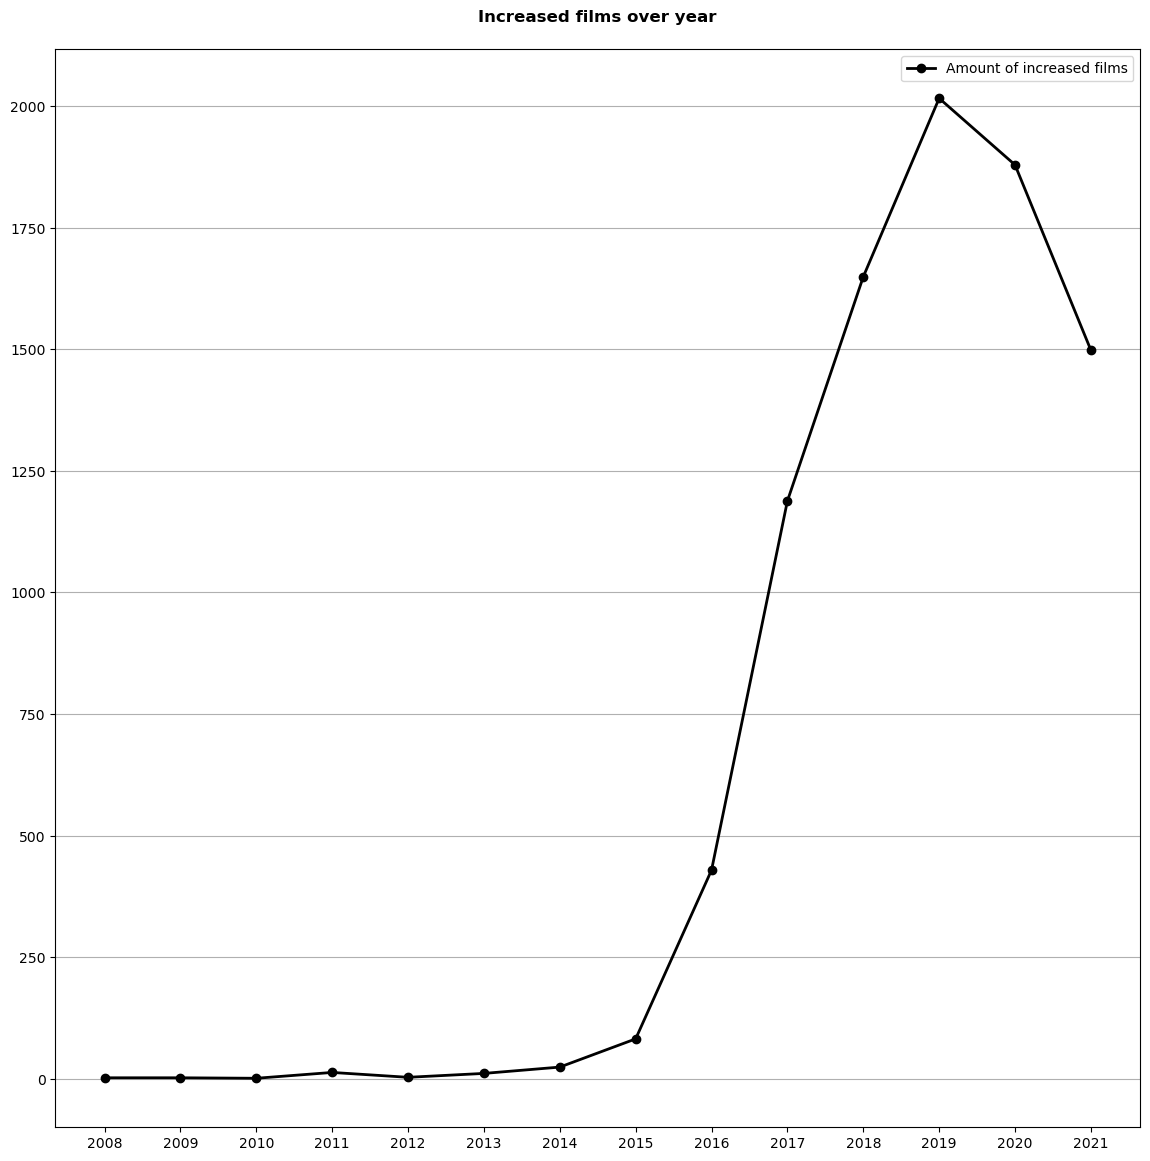

In [45]:
#1 - Create the figure, set size and color
#2 - Extract "X" and "Y" variables
#3 - Define the subplot space
#4 - Define the chart type
#5 - Plot adjustments

plt.figure(figsize=(14,14) , facecolor='white')

x = grouped_year['year_added']
y = grouped_year['number of releases']

plt.subplot(1,1,1)
plt.plot(
    x,y, 
    linestyle='-', 
    lw=2, 
    color='black', 
    label='Amount of increased films',
    marker='o'
    )
plt.legend()
plt.grid(True, axis='y')

plt.title(
    "Increased films over year",
    pad=20,
    color='black',
    weight='bold',
    fontsize=12
    )

plt.xticks(x)

plt.show()

**6 - How would you identify the most common content rating on Netflix over the years?**

In [47]:
#1 - Process the data of the column 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [48]:
#2 - Cleaning the empty rows
df_rating_over_year = df[['show_id','title','date_added','rating']].dropna()
df_rating_over_year

,show_id,title,date_added,rating
0,s1,Dick Johnson Is Dead,2021-09-25,PG-13
1,s2,Blood & Water,2021-09-24,TV-MA
2,s3,Ganglands,2021-09-24,TV-MA
3,s4,Jailbirds New Orleans,2021-09-24,TV-MA
4,s5,Kota Factory,2021-09-24,TV-MA
...,...,...,...,...
8802,s8803,Zodiac,2019-11-20,R
8803,s8804,Zombie Dumb,2019-07-01,TV-Y7
8804,s8805,Zombieland,2019-11-01,R
8805,s8806,Zoom,2020-01-11,PG


In [49]:
#3 - Check the values on the dataset
df_rating_over_year['rating'].unique()

#We see that there are values ​​that do not match the expected pattern, we will format the data in the next step.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [50]:
#4 - Cleaning the invalid values
df_rating_over_year = df_rating_over_year[~df_rating_over_year['rating'].isin(['66 min', '74 min', '84 min'])]
df_rating_over_year['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [51]:
#5 - Extract the year
df_rating_over_year['year_added'] = df_rating_over_year['date_added'].dt.year
df_rating_over_year.drop(columns=['date_added','title'], inplace = True)
df_rating_over_year

C:\Users\jpkun\AppData\Local\Temp\ipykernel_29100\324106603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_over_year['year_added'] = df_rating_over_year['date_added'].dt.year
C:\Users\jpkun\AppData\Local\Temp\ipykernel_29100\324106603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_over_year.drop(columns=['date_added','title'], inplace = True)


,show_id,rating,year_added
0,s1,PG-13,2021
1,s2,TV-MA,2021
2,s3,TV-MA,2021
3,s4,TV-MA,2021
4,s5,TV-MA,2021
...,...,...,...
8802,s8803,R,2019
8803,s8804,TV-Y7,2019
8804,s8805,R,2019
8805,s8806,PG,2020


In [52]:
#6 - Grouped the dataset

#.size(): conta quantas linhas existem em cada grupo (ou seja, o número de títulos);
#.reset_index(name='count'): transforma o resultado de volta em um DataFrame com uma nova coluna chamada "count" que contém essas contagens.

grouped_rating_year = df_rating_over_year.groupby(['rating','year_added']).size().reset_index(name='count')
grouped_rating_year.sort_values('year_added', inplace = True)

grouped_rating_year



,rating,year_added,count
62,TV-MA,2008,2
63,TV-MA,2009,2
11,NR,2010,1
74,TV-PG,2011,5
43,TV-14,2011,5
...,...,...,...
42,R,2021,190
83,TV-PG,2021,97
61,TV-G,2021,44
27,PG,2021,58


In [53]:
#7 - returns for each year the most common age rating.

    #7.1 - df.groupby('year_added'): agrupa o DataFrame por ano;

    #7.2  - ['rating']: escolhe apenas a coluna rating dentro de cada grupo;

    #7.3 - .agg(...): aplica uma função personalizada a esse grupo;

    #7.4 - lambda x: x.value_counts().idxmax():

    #7.5 - x.value_counts() conta quantas vezes cada classificação aparece naquele ano;

    #7.6 - .idxmax() retorna a classificação com maior contagem.

rating_over_year = df_rating_over_year.groupby('year_added')['rating'].agg(lambda x: x.value_counts().idxmax()).reset_index(name ='common rating')

print("The common rating over the year is TV-MA")
rating_over_year


The common rating over the year is TV-MA


,year_added,common rating
0,2008,TV-MA
1,2009,TV-MA
2,2010,NR
3,2011,TV-14
4,2012,PG
5,2013,NR
6,2014,TV-MA
7,2015,TV-MA
8,2016,TV-MA
9,2017,TV-MA


**7 - What types of content (TV Shows vs. Movies) are most frequently added to the platform?**

In [56]:
#1
df_movies_shows_added = df[['show_id','type','date_added']].dropna()
df_movies_shows_added

,show_id,type,date_added
0,s1,Movie,2021-09-25
1,s2,TV Show,2021-09-24
2,s3,TV Show,2021-09-24
3,s4,TV Show,2021-09-24
4,s5,TV Show,2021-09-24
...,...,...,...
8802,s8803,Movie,2019-11-20
8803,s8804,TV Show,2019-07-01
8804,s8805,Movie,2019-11-01
8805,s8806,Movie,2020-01-11


In [57]:
#2
df_movies_shows_added['year added'] = df_movies_shows_added['date_added'].dt.year
df_movies_shows_added.drop(columns='date_added', inplace = True)

df_movies_shows_added

,show_id,type,year added
0,s1,Movie,2021
1,s2,TV Show,2021
2,s3,TV Show,2021
3,s4,TV Show,2021
4,s5,TV Show,2021
...,...,...,...
8802,s8803,Movie,2019
8803,s8804,TV Show,2019
8804,s8805,Movie,2019
8805,s8806,Movie,2020


In [61]:
#3
grouped_movies_shows_added = df_movies_shows_added.groupby(by=['year added','type'])['show_id'].count().reset_index()
grouped_movies_shows_added.rename(columns={"show_id":"Number of added types"}, inplace = True)
grouped_movies_shows_added.to_excel("movies_added_over_year.xlsx")
grouped_movies_shows_added


,year added,type,Number of added types
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [60]:


print("the most frequently content added was the movie")
grouped_movies_shows_added.count()

the most frequently content added was the movie


year added               24
type                     24
Number of added types    24
dtype: int64

**8 - Based on the categories listed, how could you identify emerging genres or categories that gained popularity in the years with the most title additions?**

***Let's just look at the years 2019 and 2020, counting by four-month periods.***

In [191]:
#1 Create a df to process and store the data relevant to this analysis
#2 extract the year and months
#3 Process and organize the listed_in rows
#4 Extract the quarters of the dataset
#5 Groupt the dataset by genres, quarters, and dates added

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [257]:
#1
df_emerging_genres = df[['show_id','type','date_added','listed_in']].dropna()
df_emerging_genres

,show_id,type,date_added,listed_in
0,s1,Movie,2021-09-25,Documentaries
1,s2,TV Show,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,2021-09-24,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,2021-09-24,"Docuseries, Reality TV"
4,s5,TV Show,2021-09-24,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,s8803,Movie,2019-11-20,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,2019-11-01,"Comedies, Horror Movies"
8805,s8806,Movie,2020-01-11,"Children & Family Movies, Comedies"


In [258]:
#2
df_emerging_genres['month and year added'] = df_emerging_genres['date_added'].dt.month_name()+"-"+df_emerging_genres['date_added'].dt.year.astype(str)
df_emerging_genres

,show_id,type,date_added,listed_in,month and year added
0,s1,Movie,2021-09-25,Documentaries,September-2021
1,s2,TV Show,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries",September-2021
2,s3,TV Show,2021-09-24,"Crime TV Shows, International TV Shows, TV Act...",September-2021
3,s4,TV Show,2021-09-24,"Docuseries, Reality TV",September-2021
4,s5,TV Show,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",September-2021
...,...,...,...,...,...
8802,s8803,Movie,2019-11-20,"Cult Movies, Dramas, Thrillers",November-2019
8803,s8804,TV Show,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies",July-2019
8804,s8805,Movie,2019-11-01,"Comedies, Horror Movies",November-2019
8805,s8806,Movie,2020-01-11,"Children & Family Movies, Comedies",January-2020


In [259]:
#3
df_emerging_genres['listed_in'] = df_emerging_genres['listed_in'].str.split(', ')
df_emerging_genres

,show_id,type,date_added,listed_in,month and year added
0,s1,Movie,2021-09-25,[Documentaries],September-2021
1,s2,TV Show,2021-09-24,"[International TV Shows, TV Dramas, TV Mysteries]",September-2021
2,s3,TV Show,2021-09-24,"[Crime TV Shows, International TV Shows, TV Ac...",September-2021
3,s4,TV Show,2021-09-24,"[Docuseries, Reality TV]",September-2021
4,s5,TV Show,2021-09-24,"[International TV Shows, Romantic TV Shows, TV...",September-2021
...,...,...,...,...,...
8802,s8803,Movie,2019-11-20,"[Cult Movies, Dramas, Thrillers]",November-2019
8803,s8804,TV Show,2019-07-01,"[Kids' TV, Korean TV Shows, TV Comedies]",July-2019
8804,s8805,Movie,2019-11-01,"[Comedies, Horror Movies]",November-2019
8805,s8806,Movie,2020-01-11,"[Children & Family Movies, Comedies]",January-2020


In [260]:
df_emerging_genres = df_emerging_genres.explode('listed_in')
df_emerging_genres

,show_id,type,date_added,listed_in,month and year added
0,s1,Movie,2021-09-25,Documentaries,September-2021
1,s2,TV Show,2021-09-24,International TV Shows,September-2021
1,s2,TV Show,2021-09-24,TV Dramas,September-2021
1,s2,TV Show,2021-09-24,TV Mysteries,September-2021
2,s3,TV Show,2021-09-24,Crime TV Shows,September-2021
...,...,...,...,...,...
8805,s8806,Movie,2020-01-11,Children & Family Movies,January-2020
8805,s8806,Movie,2020-01-11,Comedies,January-2020
8806,s8807,Movie,2019-03-02,Dramas,March-2019
8806,s8807,Movie,2019-03-02,International Movies,March-2019


In [287]:
#4
#4.1 lets extract only 2019 dataset

df_emerging_genres_2019 = df_emerging_genres.where(
    (df_emerging_genres['date_added']>='2019-01-01') 
    &
    (df_emerging_genres['date_added']<='2019-12-31')
).dropna()

# Converte para string e substitui os NaNs por espaço
df_emerging_genres_2019.isna().sum()


show_id                 0
type                    0
date_added              0
listed_in               0
month and year added    0
dtype: int64

In [289]:
#4.2 lets extract the 2019 quarters

conditions = [
    (df_emerging_genres_2019['date_added']>='2019-01-01') & (df_emerging_genres_2019['date_added']<='2019-04-30'),
    (df_emerging_genres_2019['date_added'] >= '2019-05-01') & (df_emerging_genres_2019['date_added'] <= '2019-08-31'),
    (df_emerging_genres_2019['date_added'] >= '2019-09-01') & (df_emerging_genres_2019['date_added'] <= '2019-12-31')
]

choices = ['1 º Quarter','2º Quarter','3º Quarter']

df_emerging_genres_2019['Quarter 2019'] = np.select(conditions, choices, default='')
df_emerging_genres_2019

,show_id,type,date_added,listed_in,month and year added,Quarter 2019
3077,s3078,Movie,2019-12-31,Horror Movies,December-2019,3º Quarter
3077,s3078,Movie,2019-12-31,International Movies,December-2019,3º Quarter
3077,s3078,Movie,2019-12-31,Thrillers,December-2019,3º Quarter
3078,s3079,Movie,2019-12-31,Dramas,December-2019,3º Quarter
3078,s3079,Movie,2019-12-31,Independent Movies,December-2019,3º Quarter
...,...,...,...,...,...,...
8804,s8805,Movie,2019-11-01,Comedies,November-2019,3º Quarter
8804,s8805,Movie,2019-11-01,Horror Movies,November-2019,3º Quarter
8806,s8807,Movie,2019-03-02,Dramas,March-2019,1 º Quarter
8806,s8807,Movie,2019-03-02,International Movies,March-2019,1 º Quarter


In [290]:
#4.3 lets extract only 2020 dataset

df_emerging_genres_2020 = df_emerging_genres.where(
    (df_emerging_genres['date_added']>='2020-01-01') 
    &
    (df_emerging_genres['date_added']<='2020-12-31')
).dropna()

# Converte para string e substitui os NaNs por espaço
df_emerging_genres_2020

,show_id,type,date_added,listed_in,month and year added
1470,s1471,Movie,2020-12-31,Dramas,December-2020
1470,s1471,Movie,2020-12-31,LGBTQ Movies,December-2020
1471,s1472,Movie,2020-12-31,Stand-Up Comedy,December-2020
1472,s1473,Movie,2020-12-31,Comedies,December-2020
1472,s1473,Movie,2020-12-31,Dramas,December-2020
...,...,...,...,...,...
8745,s8746,Movie,2020-01-01,Classic Movies,January-2020
8745,s8746,Movie,2020-01-01,Comedies,January-2020
8764,s8765,Movie,2020-01-01,Action & Adventure,January-2020
8805,s8806,Movie,2020-01-11,Children & Family Movies,January-2020


In [291]:
#4.4 lets extract the 2019 quarters

conditions = [
    (df_emerging_genres_2020['date_added']>='2020-01-01') & (df_emerging_genres_2020['date_added']<='2020-04-30'),
    (df_emerging_genres_2020['date_added']>='2020-05-01') & (df_emerging_genres_2020['date_added']<='2020-08-31'),
    (df_emerging_genres_2020['date_added']>='2020-09-01') & (df_emerging_genres_2020['date_added']<='2020-12-31')
]

choices = ['1º Quarter','2º Quarter','3º Quarter']

df_emerging_genres_2020['Quarter 2020'] = np.select(conditions, choices,default='')

df_emerging_genres_2020

,show_id,type,date_added,listed_in,month and year added,Quarter 2020
1470,s1471,Movie,2020-12-31,Dramas,December-2020,3º Quarter
1470,s1471,Movie,2020-12-31,LGBTQ Movies,December-2020,3º Quarter
1471,s1472,Movie,2020-12-31,Stand-Up Comedy,December-2020,3º Quarter
1472,s1473,Movie,2020-12-31,Comedies,December-2020,3º Quarter
1472,s1473,Movie,2020-12-31,Dramas,December-2020,3º Quarter
...,...,...,...,...,...,...
8745,s8746,Movie,2020-01-01,Classic Movies,January-2020,1º Quarter
8745,s8746,Movie,2020-01-01,Comedies,January-2020,1º Quarter
8764,s8765,Movie,2020-01-01,Action & Adventure,January-2020,1º Quarter
8805,s8806,Movie,2020-01-11,Children & Family Movies,January-2020,1º Quarter


In [306]:
#5 group by 2019 quarters
df_grouped_2019 = df_emerging_genres_2019.groupby(by=['Quarter 2019','listed_in'])['show_id'].count().reset_index()
df_grouped_2019.rename(columns={"listed_in":"Genre","show_id":"Number of added genre"}, inplace = True)
df_grouped_2019.sort_values(by=['Quarter 2019','Number of added genre'], ascending=[True,False], inplace = True)

print("Genre most added in the 2019, separated by quarter: \n")
df_grouped_2019

Genre most added in the 2019, separated by quarter: 



,Quarter 2019,Genre,Number of added genre
16,1 º Quarter,International Movies,210
12,1 º Quarter,Dramas,207
7,1 º Quarter,Comedies,132
17,1 º Quarter,International TV Shows,102
15,1 º Quarter,Independent Movies,82
...,...,...,...
113,3º Quarter,Stand-Up Comedy & Talk Shows,4
118,3º Quarter,TV Mysteries,4
120,3º Quarter,TV Thrillers,4
95,3º Quarter,Faith & Spirituality,3


In [304]:
#5 group by 2020 quarters
df_grouped_2020 = df_emerging_genres_2020.groupby(by=['Quarter 2020','listed_in'])['show_id'].count().reset_index()
df_grouped_2020.rename(columns={"listed_in":"Genre","show_id":"Number of added genre"}, inplace = True)
df_grouped_2020.sort_values(by=['Quarter 2020','Number of added genre'], ascending=[True,False], inplace = True)

print("Genre most added in the 2020, separated by quarter: \n")
df_grouped_2020

Genre most added in the 2020, separated by quarter: 



,Quarter 2020,Genre,Number of added genre
11,1º Quarter,Dramas,182
15,1º Quarter,International Movies,165
6,1º Quarter,Comedies,150
16,1º Quarter,International TV Shows,102
0,1º Quarter,Action & Adventure,64
...,...,...,...
82,3º Quarter,Anime Features,2
90,3º Quarter,Cult Movies,2
107,3º Quarter,Science & Nature TV,2
94,3º Quarter,Faith & Spirituality,1


**3 - Which are the top 5 countries that produce the most content on Netflix?**

In [23]:
df_countries = df[['show_id','type','country']].dropna()

#831 empty rows
#empty rows are 9,4%

In [27]:
pivot_top5_countries = df.pivot_table(
    index='country', columns='type', values='show_id', aggfunc='count')

pivot_top5_countries

type,Movie,TV Show
country,,
", France, Algeria",1.0,NaN
", South Korea",NaN,1.0
Argentina,38.0,18.0
"Argentina, Brazil, France, Poland, Germany, Denmark",1.0,NaN
"Argentina, Chile",2.0,NaN
...,...,...
Venezuela,1.0,NaN
"Venezuela, Colombia",1.0,NaN
Vietnam,7.0,NaN


In [30]:
pivot_top5_countries.sort_values(by=['Movie','TV Show'], ascending = [False, False])

type,Movie,TV Show
country,,
United States,2058.0,760.0
India,893.0,79.0
United Kingdom,206.0,213.0
Canada,122.0,59.0
Spain,97.0,48.0
...,...,...
"United States, Netherlands, Japan, France",NaN,1.0
"United States, New Zealand, Japan",NaN,1.0
"United States, Poland",NaN,1.0


In [31]:
import pandas as pd

data = {
    'Department': ['Sales', 'Sales', 'IT', 'IT', 'HR', 'HR'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Month': ['Jan', 'Jan', 'Feb', 'Feb', 'Jan', 'Feb'],
    'Salary': [3000, 3200, 4000, 4200, 2500, 2600]
}

df = pd.DataFrame(data)

pivot = df.pivot_table(
    values='Salary',
    index='Department',
    columns='Month',
    aggfunc=['mean', 'sum']
)

pivot

mean             sum        
Month          Feb     Jan     Feb     Jan
Department                                
HR          2600.0  2500.0  2600.0  2500.0
IT          4100.0     NaN  8200.0     NaN
Sales          NaN  3100.0     NaN  6200.0